In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
cl = 'annotation.tsv'
df_ann = pd.read_csv(cl, sep='\t', index_col=1)
ENST = df_ann[['CD44' in s for s in df_ann['Gene name']]].index.tolist()
CD44 = df_ann[['CD44' in s for s in df_ann['Gene name']]].loc[:, 'Transcript name']
iso = ['S3', 'S11', 'S7', 'S16', 'S5', 'S6', 'S1']

In [7]:
zeros = [0]*7
TPM_arr = pd.DataFrame(zeros, index=ENST, columns=['Example'])
TPM_arr.head()

,Example
ENST00000428726,0
ENST00000415148,0
ENST00000433892,0
ENST00000263398,0
ENST00000278386,0


In [8]:
def iso_check(tbl, j):
    tbl.index = tbl.index.map(lambda x: str(x)[:15]) # cut last digits
    result = tbl.query('Name in @ENST') # choose certain rows
    TPM = result.loc[:, 'TPM']
    TPM_arr[iso[j]] = TPM

In [9]:
cwd = os.getcwd()
j = 0

for file in os.listdir(cwd):
    filename = os.fsdecode(file)
    if filename.endswith('.tsv') and filename != 'annotation.tsv': 
        tsv =  filename
        table = pd.read_csv(tsv, sep='\t', index_col=0)
        table[1:4] = table[1:4].apply(pd.to_numeric)
        table = table.add(1)
        table = table.apply(np.log2)
        iso_check(table, j)
        j+=1
        continue

In [10]:
TPM_arr['Transcript'] = CD44
transcript = (TPM_arr.loc[:, 'Transcript'].to_list())*7
TPM_arr = TPM_arr.drop('Transcript', axis=1)
TPM_arr = TPM_arr.drop('Example', axis=1)
TPM_arr.head()

,S3,S11,S7,S16,S5,S6,S1
ENST00000428726,4.125083,4.881415,4.897845,3.266359,5.143475,3.171049,4.066126
ENST00000415148,1.982815,3.669589,3.902737,1.296393,2.717497,2.701482,4.629522
ENST00000433892,6.563232,6.805419,7.187388,4.999490,6.772040,6.483990,6.983115
ENST00000263398,5.820464,5.827836,5.951847,4.427028,5.877912,4.762278,5.533584
ENST00000278386,0.657680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
TPM_arr_plot = pd.melt(TPM_arr)
TPM_arr_plot = TPM_arr_plot.rename(columns={"variable": "Sample", "value": "TPM"})
isoform = (TPM_arr.index.tolist())*7
TPM_arr_plot['Isoforms'] = isoform
TPM_arr_plot['Transcript'] = transcript

TPM_arr_plot.head()

,Sample,TPM,Isoforms,Transcript
0,S3,4.125083,ENST00000428726,CD44-208
1,S3,1.982815,ENST00000415148,CD44-206
2,S3,6.563232,ENST00000433892,CD44-209
3,S3,5.820464,ENST00000263398,CD44-201
4,S3,0.657680,ENST00000278386,CD44-203


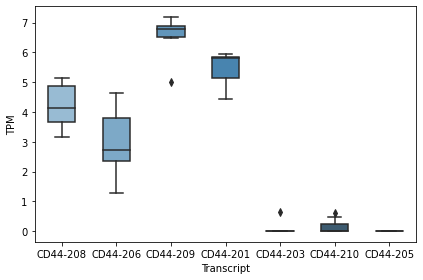

In [19]:
plot = sns.boxplot(y='TPM', x='Transcript', 
                 data=TPM_arr_plot, 
                 width=0.5,
                 palette="Blues_d")
#plot.set_xticklabels(labels=['CD44v1', 'CD44v2', 'CD44v3', 'CD44v4', 'CD44v5', 'CD44v6','CD44v7'], rotation=30)
plt.tight_layout()

In [13]:
plot.get_figure().savefig('samples_TPM.png', dpi=300)

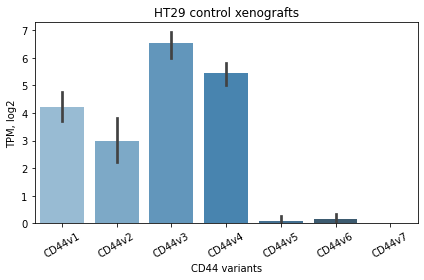

In [22]:
barpl = sns.barplot(x='Transcript', y='TPM', data=TPM_arr_plot, palette="Blues_d")
barpl.set_xticklabels(labels=['CD44v1', 'CD44v2', 'CD44v3', 'CD44v4', 'CD44v5', 'CD44v6','CD44v7'], rotation=30)
barpl.set(xlabel='CD44 variants', ylabel='TPM, log2')
barpl.set_title('HT29 control xenografts')
plt.tight_layout()
barpl.figure.savefig('HT29_patients.png', dpi=300)